In [ ]:
!pip3 install pandas dash
!pip3 install jupyter_plotly_dash
!pip3 install jupyter-dash
!pip3 install wget

In [17]:
import wget
import pandas as pd

spacex_csv_file = wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
spacex_dash_app = wget.download("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py")


#!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

spacex_df=pd.read_csv(spacex_csv_file)
spacex_df.loc[spacex_df['Launch Site'] == 'CCAFS SLC-40']
spacex_df

,Unnamed: 0,Flight Number,Launch Site,Mission Outcome,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,Success,0,0.00,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,Success,0,0.00,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,Success,0,525.00,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,Success,0,500.00,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,Success,0,677.00,F9 v1.0 B0007,v1.0
5,5,7,CCAFS LC-40,Success,0,3170.00,F9 v1.1,v1.1
6,6,8,CCAFS LC-40,Success,0,3325.00,F9 v1.1,v1.1
7,7,9,CCAFS LC-40,Success,0,2296.00,F9 v1.1,v1.1
8,8,10,CCAFS LC-40,Success,0,1316.00,F9 v1.1,v1.1
9,9,11,CCAFS LC-40,Success,0,4535.00,F9 v1.1,v1.1


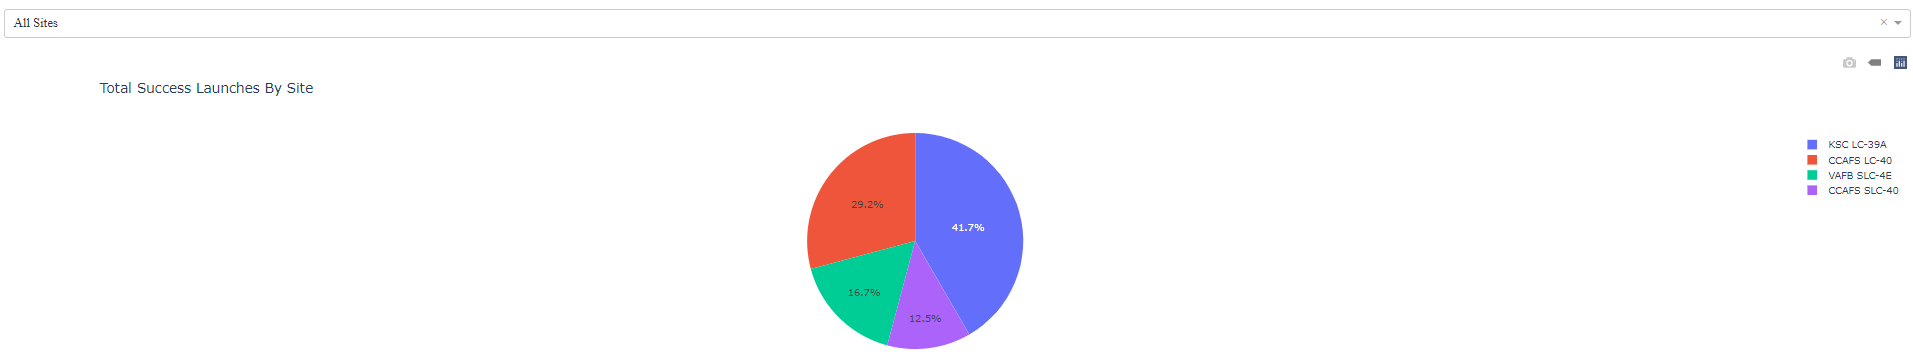
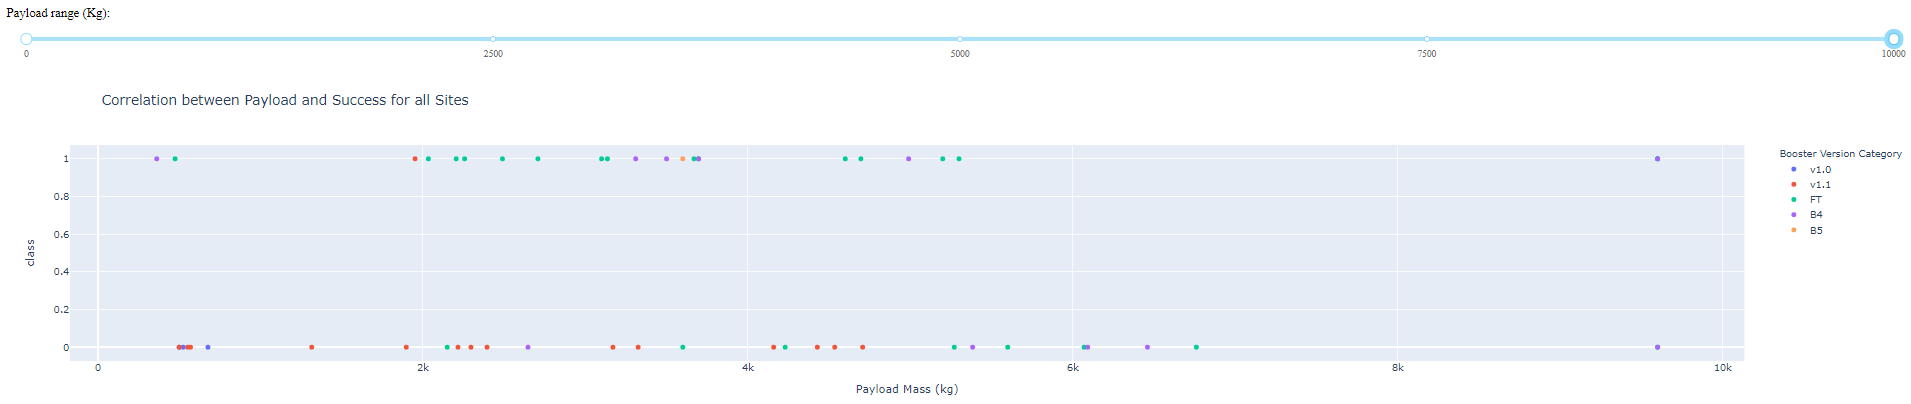

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                # dcc.Dropdown(id='site-dropdown',...)
                                
                                html.Div(dcc.Dropdown(id='site-dropdown',
                                                     options=[
                                                         {'label': 'All Sites', 'value': 'All'},
                                                         {'label': 'site1', 'value': 'site1'},
                                                     ],
                                                     value='ALL',
                                                     placeholder="place holder here",
                                                     searchable=True
                                                     )),                            
                                
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                        
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P(["Payload range (Kg):", dcc.RangeSlider(id='payload-slider',
                                                                              min=0, max=10000, step=1000,
                                                                              marks={0: '0',
                                                                                    100: '100'},
                                                                              value=[min_payload, max_payload])]),
                                
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback( Output(component_id='success-pie-chart', component_property='figure'),
               Input(component_id='site-dropdown', component_property='value'))

@app.callback( Output(component_id='success-payload-scatter-chart', component_property='figure'),
               Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value"))


# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
def get_pie_chart(entered_site):
    filtered_df = spacex_df

    if entered_site == 'ALL':
        fig = px.pie(data=filtered_df, values='class', 
        names='Launch Site', 
        title='title')
        return fig
    else:
        fig = px.pie(data=filtered_df[filtered_df['Launch Site'] == entered_site], values='class',
        names = 'class',
        title='title')
        return fig
        # return the outcomes piechart for a selected site

        
def get_payload_scatter_chart(entered_site, entered_payload):
    filtered_df = spacex_df
    filtered_df1 = filtered_df[filtered_df['Payload Mass (kg)'] > min_payload]
    filtered_df2 = filtered_df1[filtered_df['Payload Mass (kg)'] < max_payload]
    
    if entered_site == 'ALL':
        fig = px.scatter(data=filtered_df2, x="Payload Mass (kg)", y="class", color="Booster Version Category")
        return fig
    else:
        fig = px.scatter(data=filtered_df2[filtered_df2['Launch Site'] == entered_site], x="Payload Mass (kg)", y="class", color="Booster Version Category")
        return fig



# Run the app
if __name__ == '__main__':
    app.run_server()

(below is a previous dashboard exercise)
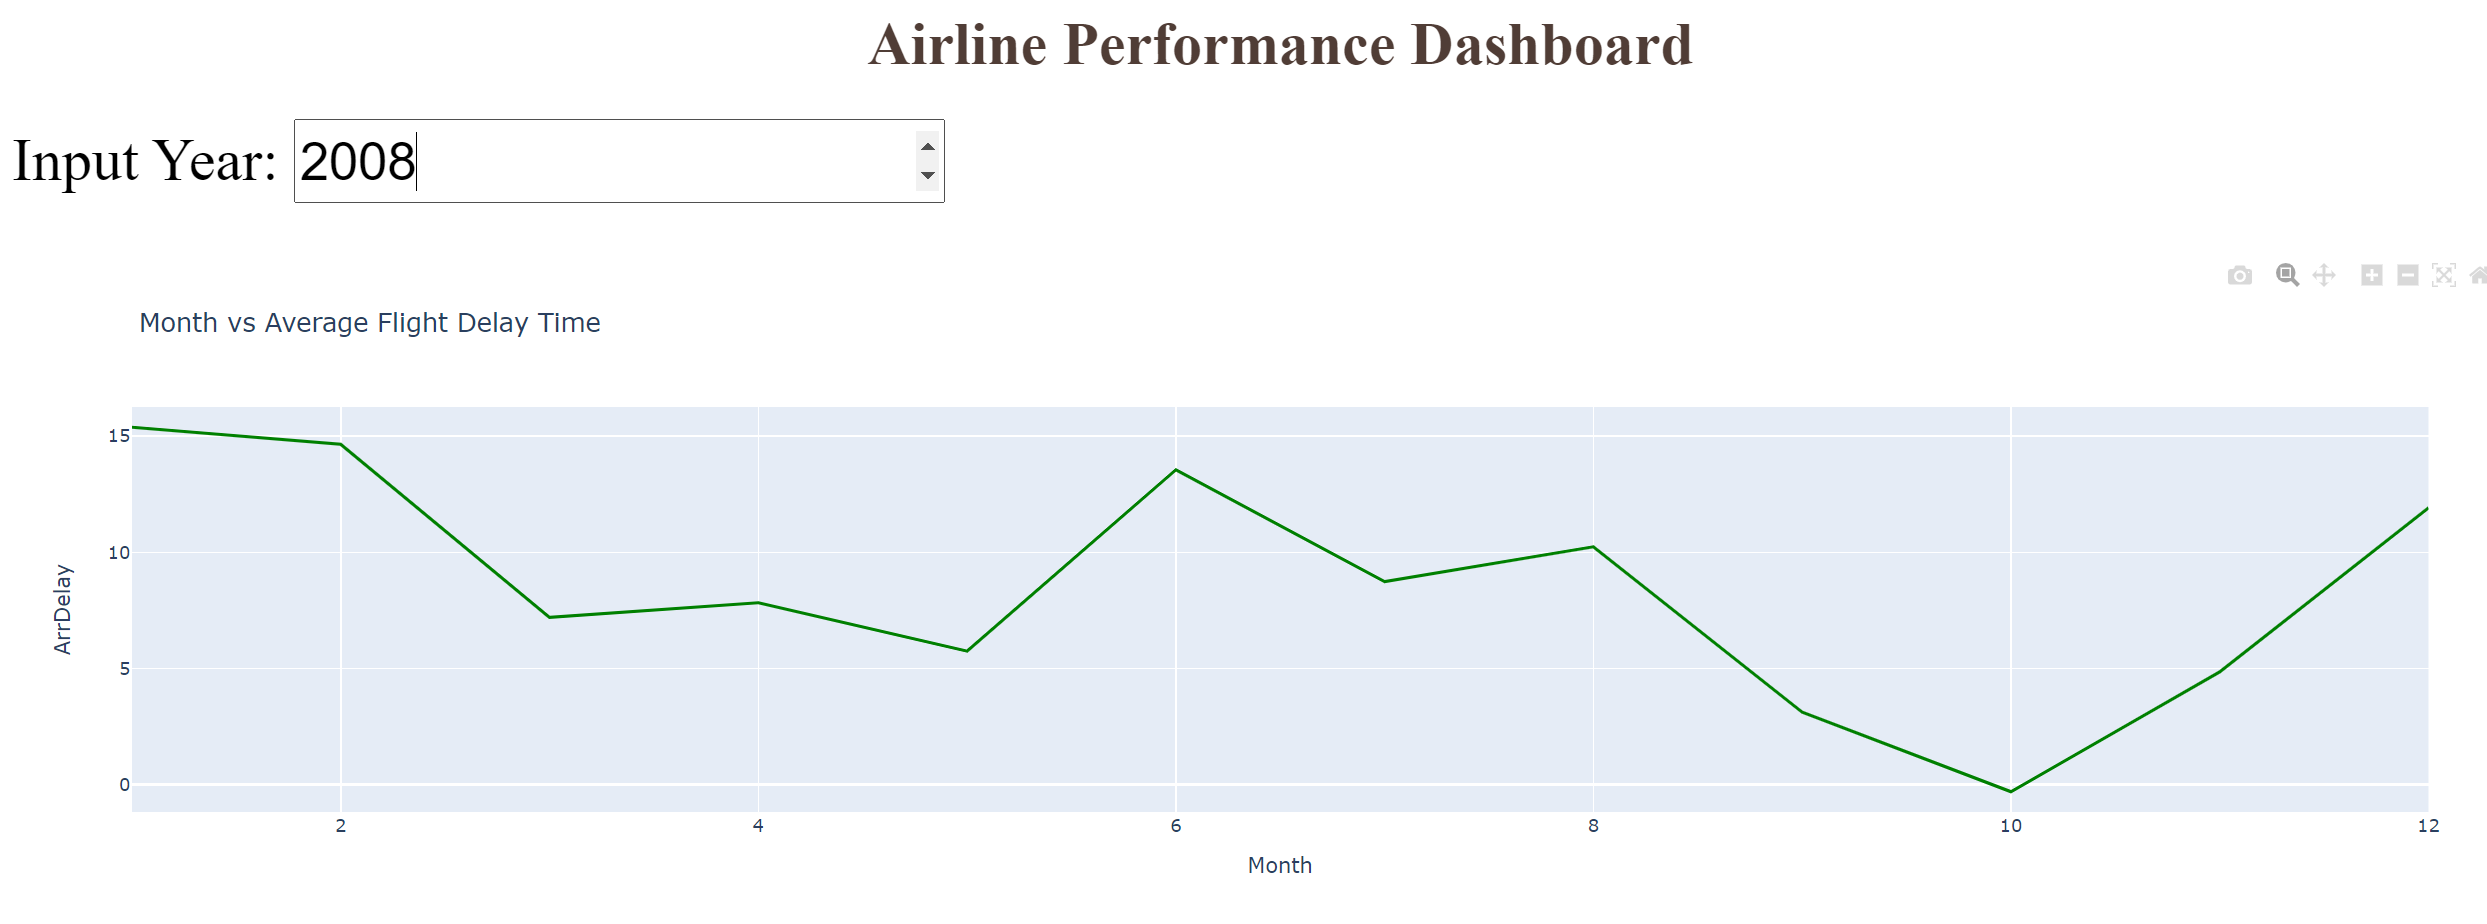

In [ ]:
# Import required libraries
import pandas as pd
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})
# Create a dash application
app = dash.Dash(__name__)
                               
app.layout = html.Div(children=[ html.H1('Airline Performance Dashboard', 
                                style={'textAlign': 'center', 'color': '#503D36',
                                'font-size': 40}),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', value='2010', 
                                type='number', style={'height':'50px', 'font-size': 35}),], 
                                style={'font-size': 40}),
                                html.Br(),
                                html.Br(),
                                html.Div(dcc.Graph(id='line-plot')),
                                ])

# add callback decorator
@app.callback( Output(component_id='line-plot', component_property='figure'),
               Input(component_id='input-year', component_property='value'))

# Add computation to callback function and return graph
def get_graph(entered_year):
    # Select 2019 data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    # Group the data by Month and compute average over arrival delay time.
    line_data = df.groupby('Month')['ArrDelay'].mean().reset_index()

    fig = go.Figure(data=go.Scatter(x=line_data['Month'], y=line_data['ArrDelay'], mode='lines', marker=dict(color='green')))
    fig.update_layout(title='Month vs Average Flight Delay Time', xaxis_title='Month', yaxis_title='ArrDelay')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server()